In [1]:
from read_data import *
from hyper import *
from alignment import *
from datasets.preprecossing import *
from core import *
from datasets.loading import *
from datasets.hc_dataset import *
from datasets.improve_dataset import  *
from datasets.balance_dataset import *
from utils.linkage import *
from model.improvehc import improvehc
from model.balancehc import balancehc

from utils.poincare import *


In [3]:
method = 'average'
cell_path1 = './datas/test/A35.h5'
folder_path1 = "./datas/1122/1/"
radius1 = 147.63807097087118 
c1= 0.001
epoches1 = 5
cell_path2 = './datas/test/A36.h5'
folder_path2 = "./datas/1122/2/"
radius2 = 149.58609561052123 
c2= 0.001
epoches2 =5

In [4]:
# loss1 = merge_by_radius(cell_path1,folder_path1,radius1,method)
# print("cell meta score for dataset1: {}\n".format(loss1))


In [5]:


adata1 = pd.read_csv(folder_path1+"merge_cell_data.csv")
cell_meta = pd.read_csv(folder_path1+"merge_cell_meta.csv")
cell_meta = cell_meta.set_index(cell_meta.columns[0])
adata1 = adata1.set_index(adata1.columns[0])
adata1 = anndata.AnnData(adata1)
adata1.obs['celltype'] = cell_meta.values.reshape(-1)

/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/ipykernel_96102/1659954021.py:5: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata1 = anndata.AnnData(adata1)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [6]:
# loss2 = merge_by_radius(cell_path2,folder_path2,radius2,method)
# print("cell meta score for dataset2: {}".format(loss2))

In [7]:

adata2 = pd.read_csv(folder_path2+"merge_cell_data.csv")
cell_meta = pd.read_csv(folder_path2+"merge_cell_meta.csv")
cell_meta = cell_meta.set_index(cell_meta.columns[0])
adata2 = adata2.set_index(adata2.columns[0])
adata2 = anndata.AnnData(adata2)
adata2.obs['celltype'] = cell_meta.values.reshape(-1)

/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/ipykernel_96102/1560116638.py:5: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata2 = anndata.AnnData(adata2)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [8]:
preprocessing_cluster(adata1,N_pcs=100,resolution=1.0)
preprocessing_cluster(adata2,N_pcs=100,resolution=1.0)

inter_gene = sort_data(adata1,adata2)

tmp1 = calculate_cluster_centroid_for_genes(adata1,inter_gene,folder_path1)
tmp2 = calculate_cluster_centroid_for_genes(adata2,inter_gene,folder_path2)

ari = adjusted_rand_score(adata1.obs['celltype'].tolist(), adata1.obs['leiden'].tolist())
print("ARI score for adata1: ", ari)

ari = adjusted_rand_score(adata2.obs['celltype'].tolist(), adata2.obs['leiden'].tolist())
print("ARI score for adata2: ", ari)
meta_list1 = []
clustername = adata1.obs['leiden'].unique().tolist()
clustername = list(map(int, clustername))
clustername.sort()
for value in clustername:
    indices = [i for i, x in enumerate(adata1.obs['leiden']) if x == str(value)]
    t = [adata1.obs['celltype'].tolist()[index] for index in indices]
    most_common_element = max(t, key=t.count)
    meta_list1.append(most_common_element)
np.save(folder_path1+'tree_merge.npy',meta_list1)

    
meta_list2 = []
clustername = adata2.obs['leiden'].unique().tolist()
clustername = list(map(int, clustername))
clustername.sort()
for value in clustername:
    indices = [i for i, x in enumerate(adata2.obs['leiden']) if x == str(value)]
    t = [adata2.obs['celltype'].tolist()[index] for index in indices]
    most_common_element = max(t, key=t.count)
    meta_list2.append(most_common_element)
np.save(folder_path2+'tree_merge.npy',meta_list2)

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


1262 genes are used to calculate cost of tree alignment.

ARI score for adata1:  0.325063797225675
ARI score for adata2:  0.3073865924456776


In [9]:

v1 = pd.read_csv(folder_path1+"merge_labels.csv")
meta = pd.read_csv(folder_path1+"merge_cell_meta.csv")
meta = meta.set_index(meta.columns[0])
meta
lisan = []
julei = []
for i in range(len(v1)):
    lisan.append(meta.iloc[v1['label'][i]][0])
    julei.append(adata1.obs['leiden'].iloc[v1['label'][i]][0])
v1['first']=lisan
v1['second']=julei
v1.to_csv(folder_path1+'meta_result.csv')

v1 = pd.read_csv(folder_path2+"merge_labels.csv")
meta = pd.read_csv(folder_path2+"merge_cell_meta.csv")
meta = meta.set_index(meta.columns[0])
meta
lisan = []
julei = []
for i in range(len(v1)):
    lisan.append(meta.iloc[v1['label'][i]][0])
    julei.append(adata2.obs['leiden'].iloc[v1['label'][i]][0])
v1['first']=lisan
v1['second']=julei
v1.to_csv(folder_path2+'meta_result.csv')

In [7]:
data_path = folder_path1+'datas.data'
start = 1
end = tmp1.shape[1]+1
lable = 0
epoches = epoches1
save_path=folder_path1
c=0
model_path=folder_path1+'model.pth'

In [8]:
np.random.seed(1234)
torch.manual_seed(1234)
x, y_true, similarities = load_data(data_path,start,end,lable)
print("{} length:{}".format(data_path,len(y_true)));
dataset = HCDataset(x, y_true, similarities, num_samples=50000)
dataloader = data.DataLoader(dataset, batch_size=32, shuffle=True, num_workers=8, pin_memory=True)
model = HypHC(dataset.n_nodes, 2, 5e-2, 5e-2 ,0.999)

if(model_path==None or os.path.exists(model_path)==False):
    model.to("cpu")
    Optimizer = getattr(optim, 'RAdam')
    optimizer = Optimizer(model.parameters(),0.0005)
    train(model,dataloader,optimizer,similarities,epoches);
    torch.save(model.state_dict(),save_path+'model.pth');
else:
    params = torch.load((model_path), map_location=torch.device('cpu'))
    model.load_state_dict(params, strict=False)
model.eval()


./datas/1122/1/datas.data length:13
Generating all pairs superset


HypHC(
  (embeddings): Embedding(13, 2)
)

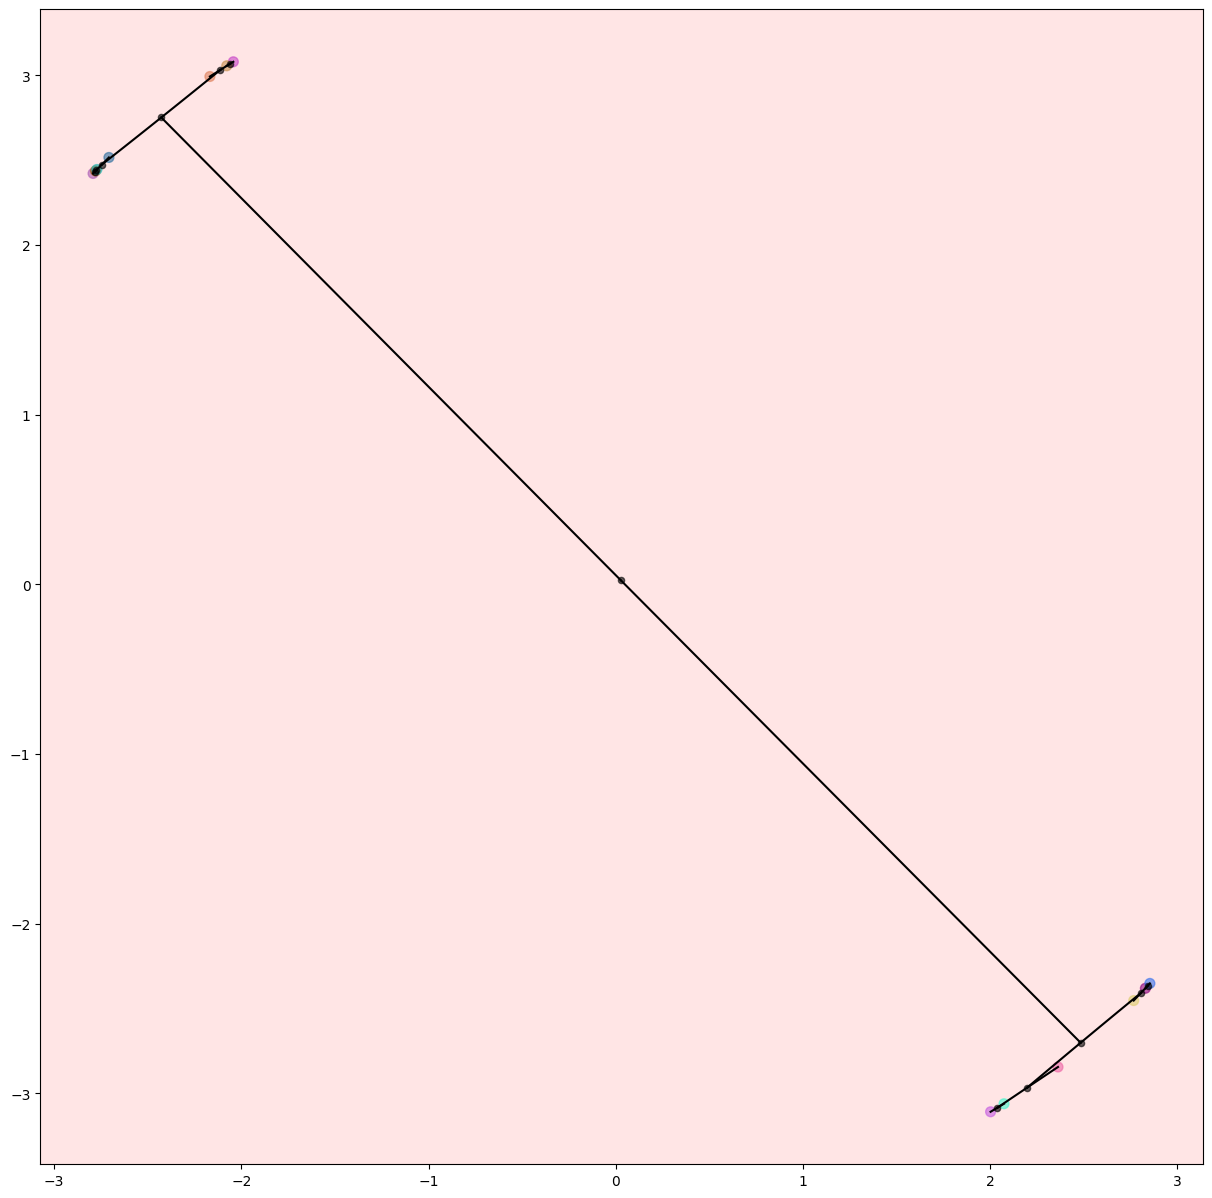

In [9]:
sim_fn = lambda x, y: torch.sum(x * y, dim=-1)
n=len(x);
leaves_embeddings = model.normalize_embeddings(model.embeddings.weight.data)
leaves_embeddings = project(leaves_embeddings).detach().cpu()
ijs = sl_np_mst_ij(leaves_embeddings,sim_fn)
uf = UnionFind(n,leaves_embeddings)
uf.merge(ijs)
count=0

tree = nx.DiGraph()
for i, j in enumerate(uf.tree()[:-1]):
    if(j!=-1):
        tree.add_edge(j, i)

n = len(leaves_embeddings)

# embeddings = np.array(uf.pos)
embeddings = complete_tree(tree, leaves_embeddings)

# where_are_NaNs = np.isnan(embeddings)
# embeddings[where_are_NaNs] = 0
colors = get_colors(y_true, 1234)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
circle = plt.Circle((0, 0), 20.0, color='r', alpha=0.1)
ax.add_artist(circle)
ax.scatter(embeddings[:n, 0]*20, embeddings[:n, 1]*20, c=colors, s=50, alpha=0.6)
ax.scatter(embeddings[n:,0]*20,embeddings[n:,1]*20,color = 'black',s=20,alpha=0.6)


for n1, n2 in tree.edges():
    x1 = embeddings[n1];
    x2 = embeddings[n2];
    plot_geodesic(x1,x2,ax)
fig.savefig(save_path+"graph.png");

np.save(save_path+'data_hyper_xy.npy',embeddings)
# embeddings = np.array(uf.pos)

embbedings = torch.tensor(embeddings)
nodes1 = [node(name=str(i),son=[]) for i in range(len(uf.tree()))]
for i in range(n):
    nodes1[i].subson=[i];
for i,j in enumerate(uf.tree()):
    if(j!=-1):
        nodes1[j].son.append(nodes1[i])
    nodes1[i].value=torch.tensor(embeddings[i]);
    nodes1[j].subson.extend(nodes1[i].subson)
ans_list = []
root = nodes1[-1];
dumpy_node = nodes1[n:]

values = [];
fathers = [];
xys = [];
search_merge_tree(root,-1,0,values,fathers,xys)
np.save(save_path+"dataname.npy",values)
np.save(save_path+"datalink.npy",fathers)
np.save(save_path+"dataxy.npy",xys)

# return loss2



In [10]:
def deep_search_tree(now,depth,path,f):
    now.f=f
    now.depth=depth;
    path.append(now);
    now.path=path.copy();
    if(f!=now):
        now.distance_to_root = f.distance_to_root + hyp_dist(f.value,now.value)
    else:
        now.distance_to_root = 0
        
    for i in now.son:
        deep_search_tree(i,depth+1,path,now);
    path.remove(now)


In [11]:
deep_search_tree(root,0,[],root)
result = []
distances = []
for index in range(n,len(nodes1)):
    i = nodes1[index]
    if(len(i.subson)==2):
        for j in i.rest(n):
            result.append([i.subson,j,int(i),1,int(j)])
for index in range(n,len(nodes1)-1):
    i = nodes1[index]
    l = i.son[0];
    r = i.son[1];
    for i1 in range(len(i.subson)):
        for i2 in range(i1+1,len(i.subson)):
            for j in i.rest(n):
                result.append([[i.subson[i1],i.subson[i2]],j,int(i),0,int(i.f)])
        

result

for i in nodes1:
    distances.append(i.distance_to_root);
distances = torch.tensor(distances)
distances

tensor([1.4025, 1.4889, 1.6144, 1.4127, 1.4641, 1.4804, 1.6144, 1.5023, 1.5036,
        1.4889, 1.4088, 1.5016, 1.4804, 1.4613, 1.4007, 1.4053, 1.4090, 1.5008,
        1.2760, 1.2711, 1.2705, 1.2564, 0.9164, 0.9166, 0.0000],
       dtype=torch.float64)

start rotate

In [12]:
embeddings = complete_tree(tree, leaves_embeddings)
embbedings = torch.tensor(embbedings)


dataset_test=balance_dataset(similarities,100,embbedings,distances,result)
dataloader = data.DataLoader(dataset_test, batch_size=1, shuffle=False, num_workers=8, pin_memory=True)

model2 = balancehc(nodes1,torch.tensor(embbedings),hyperparamter = 1)
Optimizer = getattr(optim, 'RAdam')
optimizer = Optimizer(model2.parameters(),0.0005)
for epoch in range(10):
    model2.train()
    total_loss = 0.0
    for step, datas in enumerate(dataloader):
        loss = model2.loss(datas[0],datas[1],datas[2],datas[3],datas[4],datas[5])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss
    total_loss = total_loss.item() / (step + 1.0)
    print("\t Epoch {} | average train loss: {:.6f}".format(epoch, total_loss))
    model2.update();

/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/ipykernel_95348/290560800.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embbedings = torch.tensor(embbedings)
/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/package/datasets/balance_dataset.py:54: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(temp)
/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/ipykernel_95348/290560800.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  model2 = balancehc(

	 Epoch 0 | average train loss: 0.377884


/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/package/model/balancehc.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  origin_distance = hyp_dist(torch.tensor(self.original[i]),torch.tensor(self.original[j]));
/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/package/model/balancehc.py:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  origin_distance = hyp_dist(torch.tensor(self.original[int(nodef.son[0])]),torch.tensor(self.original[k])) + hyp_dist(torch.tensor(self.original[int(nodef.son[1])]),torch.tensor(self.original[k]));
/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/package/model/balancehc.py:95: UserWarning: To copy construct from a tensor, it is recomm

	 Epoch 1 | average train loss: 0.375035
	 Epoch 2 | average train loss: 0.374020
	 Epoch 3 | average train loss: 0.371778
	 Epoch 4 | average train loss: 0.371487
	 Epoch 5 | average train loss: 0.370734
	 Epoch 6 | average train loss: 0.370349
	 Epoch 7 | average train loss: 0.371341
	 Epoch 8 | average train loss: 0.370624
	 Epoch 9 | average train loss: 0.373171


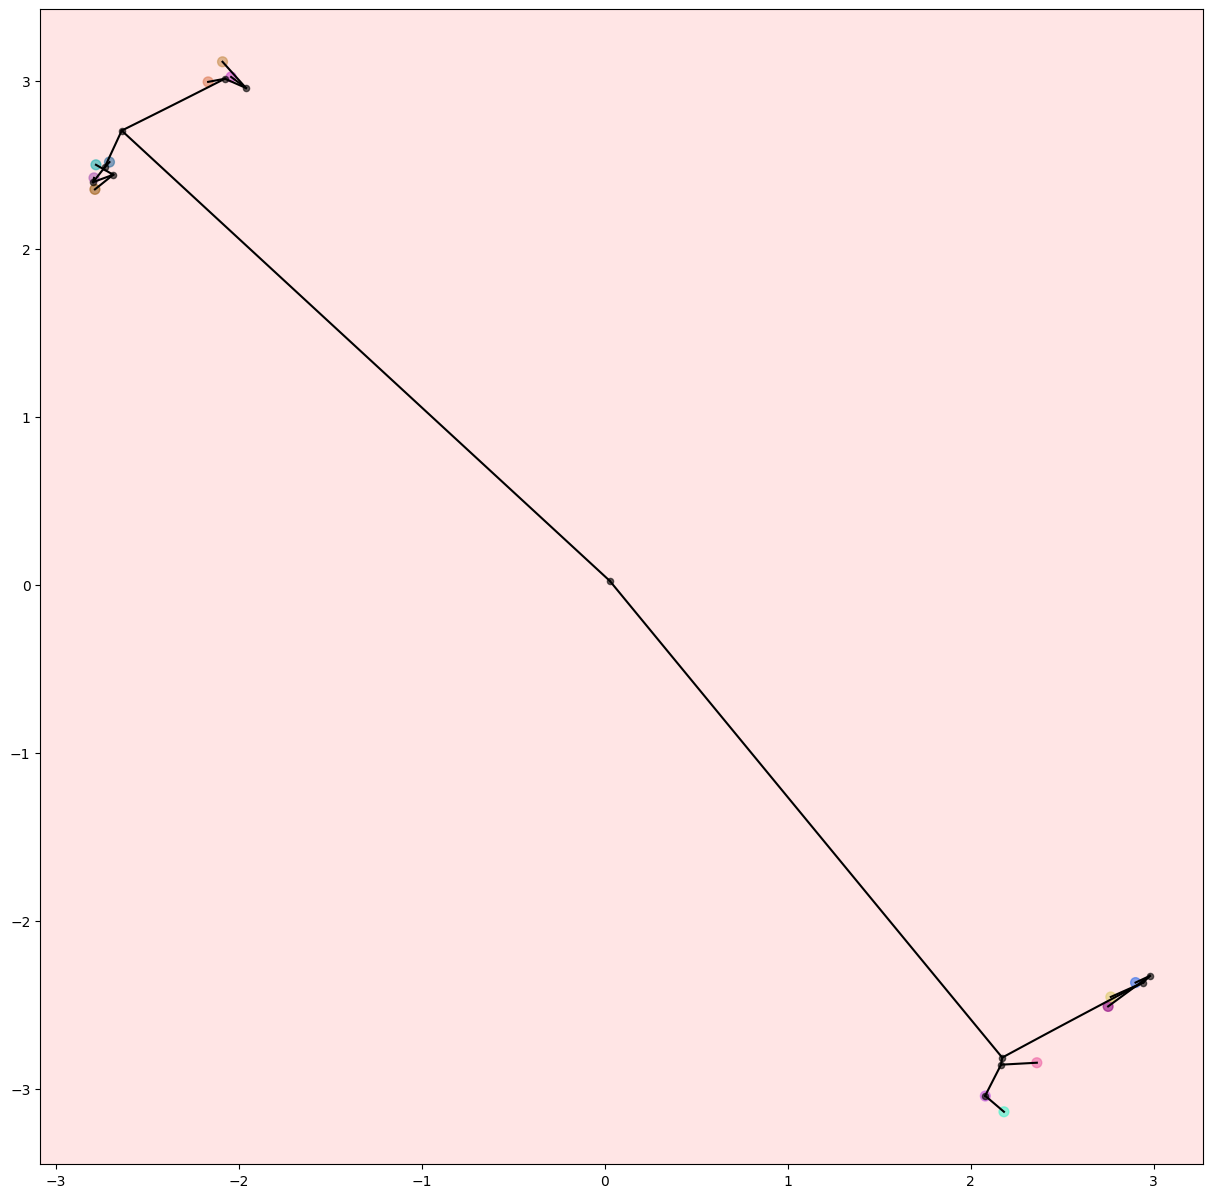

In [13]:
temp = model2.embeddings.weight.data

after_balance = embeddings.copy();
for i in range(len(temp)):
    after_balance[i] = temp[i].detach().numpy() 
# after_balance = model2.normalize_embeddings(torch.tensor(after_balance))
after_balance = project(torch.tensor(after_balance))
after_balance = np.array(after_balance)
colors = get_colors(y_true, 1234)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
circle = plt.Circle((0, 0), 20.0, color='r', alpha=0.1)
ax.add_artist(circle)
ax.scatter(after_balance[:n, 0]*20, after_balance[:n, 1]*20, c=colors, s=50, alpha=0.6)
ax.scatter(after_balance[n:,0]*20,after_balance[n:,1]*20,color ='black',s=20,alpha=0.6)
for n1, n2 in tree.edges():
    x1 = after_balance[n1];
    x2 = after_balance[n2]
    plot_geodesic(x1,x2,ax)
fig.savefig(save_path+"graph_after.png")

np.save(save_path+'dataxy.npy',np.array([after_balance[j] for j in [int(i) for i in values]]))


In [14]:
hyp_dist(torch.tensor(embeddings[1]),torch.tensor(embeddings[2])) ,hyp_dist(torch.tensor(after_balance[1]),torch.tensor(after_balance[2]))

(tensor([1.3797], dtype=torch.float64), tensor([1.3886], dtype=torch.float64))

In [15]:
hyp_dist(torch.tensor(embeddings[3]),torch.tensor(embeddings[4])) ,hyp_dist(torch.tensor(after_balance[3]),torch.tensor(after_balance[4]))

(tensor([0.4994], dtype=torch.float64), tensor([0.4994], dtype=torch.float64))

In [16]:
hyp_dist(torch.tensor(embeddings[3]),torch.tensor(embeddings[5])) ,hyp_dist(torch.tensor(after_balance[3]),torch.tensor(after_balance[5]))

(tensor([1.3752], dtype=torch.float64), tensor([1.3797], dtype=torch.float64))

In [17]:
hyp_dist(torch.tensor(embeddings[4]),torch.tensor(embeddings[5])) ,hyp_dist(torch.tensor(after_balance[4]),torch.tensor(after_balance[5]))

(tensor([1.3796], dtype=torch.float64), tensor([1.3828], dtype=torch.float64))

In [18]:
data_path = folder_path2+'datas.data'
start = 1
end = tmp2.shape[1]+1
lable = 0
epoches = epoches2
save_path=folder_path2
c=0
model_path=folder_path2+'model.pth'

In [19]:
np.random.seed(1234)
torch.manual_seed(1234)
x, y_true, similarities = load_data(data_path,start,end,lable)
print("{} length:{}".format(data_path,len(y_true)));
dataset = HCDataset(x, y_true, similarities, num_samples=50000)
dataloader = data.DataLoader(dataset, batch_size=32, shuffle=True, num_workers=8, pin_memory=True)
model = HypHC(dataset.n_nodes, 2, 5e-2, 5e-2 ,0.999)

if(model_path==None or os.path.exists(model_path)==False):
    model.to("cpu")
    Optimizer = getattr(optim, 'RAdam')
    optimizer = Optimizer(model.parameters(),0.0005)
    train(model,dataloader,optimizer,similarities,epoches);
    torch.save(model.state_dict(),save_path+'model.pth');
else:
    params = torch.load((model_path), map_location=torch.device('cpu'))
    model.load_state_dict(params, strict=False)
model.eval()


./datas/1122/2/datas.data length:13
Generating all pairs superset


HypHC(
  (embeddings): Embedding(13, 2)
)

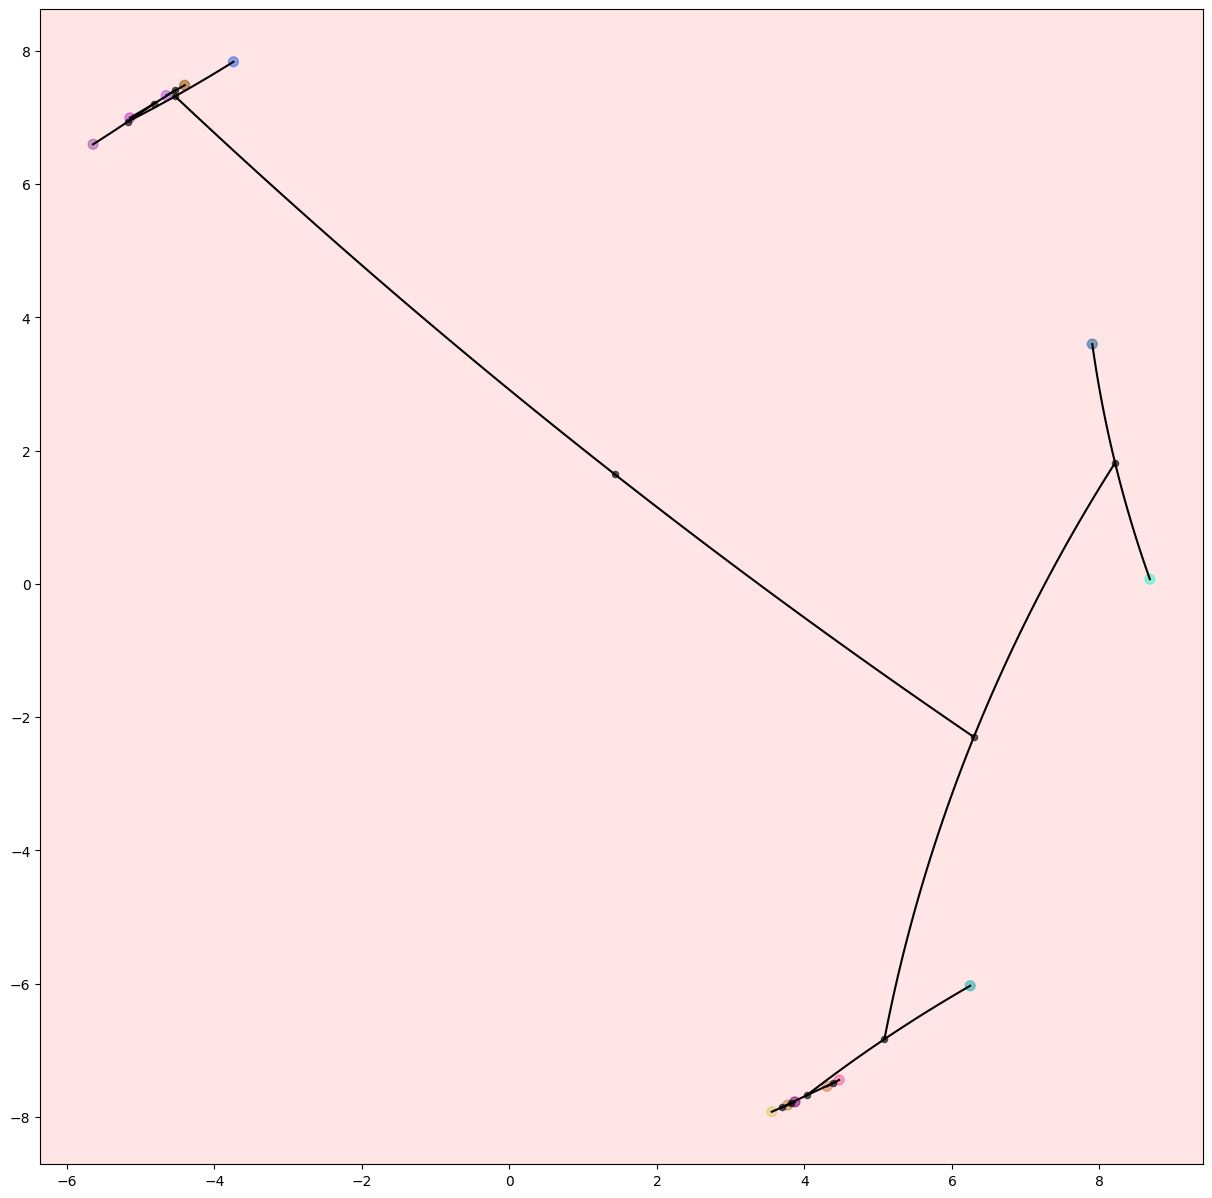

In [20]:
sim_fn = lambda x, y: torch.sum(x * y, dim=-1)
n=len(x);
leaves_embeddings = model.normalize_embeddings(model.embeddings.weight.data)
leaves_embeddings = project(leaves_embeddings).detach().cpu()
ijs = sl_np_mst_ij(leaves_embeddings,sim_fn)
uf = UnionFind(n,leaves_embeddings)
uf.merge(ijs)
count=0

tree = nx.DiGraph()
for i, j in enumerate(uf.tree()[:-1]):
    if(j!=-1):
        tree.add_edge(j, i)

n = len(leaves_embeddings)

# embeddings = np.array(uf.pos)
embeddings = complete_tree(tree, leaves_embeddings)

# where_are_NaNs = np.isnan(embeddings)
# embeddings[where_are_NaNs] = 0
colors = get_colors(y_true, 1234)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
circle = plt.Circle((0, 0), 20.0, color='r', alpha=0.1)
ax.add_artist(circle)
ax.scatter(embeddings[:n, 0]*20, embeddings[:n, 1]*20, c=colors, s=50, alpha=0.6)
ax.scatter(embeddings[n:,0]*20,embeddings[n:,1]*20,color = 'black',s=20,alpha=0.6)


for n1, n2 in tree.edges():
    x1 = embeddings[n1];
    x2 = embeddings[n2];
    plot_geodesic(x1,x2,ax)
fig.savefig(save_path+"graph.png");

np.save(save_path+'data_hyper_xy.npy',embeddings)
# embeddings = np.array(uf.pos)

embbedings = torch.tensor(embeddings)
nodes1 = [node(name=str(i),son=[]) for i in range(len(uf.tree()))]
for i in range(n):
    nodes1[i].subson=[i];
for i,j in enumerate(uf.tree()):
    if(j!=-1):
        nodes1[j].son.append(nodes1[i])
    nodes1[i].value=torch.tensor(embeddings[i]);
    nodes1[j].subson.extend(nodes1[i].subson)
ans_list = []
root = nodes1[-1];
dumpy_node = nodes1[n:]

values = [];
fathers = [];
xys = [];
search_merge_tree(root,-1,0,values,fathers,xys)
np.save(save_path+"dataname.npy",values)
np.save(save_path+"datalink.npy",fathers)
np.save(save_path+'dataxy.npy',xys)

# return loss2



In [21]:
values

['24',
 '20',
 '12',
 '19',
 '4',
 '18',
 '1',
 '16',
 '6',
 '7',
 '23',
 '21',
 '11',
 '17',
 '14',
 '3',
 '8',
 '15',
 '10',
 '13',
 '5',
 '9',
 '22',
 '0',
 '2']

In [22]:
fathers

[-1,
 0,
 1,
 1,
 3,
 3,
 5,
 5,
 7,
 7,
 0,
 10,
 11,
 11,
 13,
 14,
 14,
 13,
 17,
 17,
 19,
 19,
 10,
 22,
 22]

In [23]:
deep_search_tree(root,0,[],root)
result = []
distances = []
for index in range(n,len(nodes1)):
    i = nodes1[index]
    if(len(i.subson)==2):
        for j in i.rest(n):
            result.append([i.subson,j,int(i),1,int(j)])
for index in range(n,len(nodes1)-1):
    i = nodes1[index]
    l = i.son[0];
    r = i.son[1];
    for i1 in range(len(i.subson)):
        for i2 in range(i1+1,len(i.subson)):
            for j in i.rest(n):
                result.append([[i.subson[i1],i.subson[i2]],j,int(i),0,int(i.f)])
        
# for i in binary_sons:

#     if(len(i.subson)==2):
#         for j in i.rest(n):
#             result.append([i.subson,j,int(i),int(find_lca(i,nodes1[j])),1,i.subson])
#     else:
#         l = i.son[0];
#         r = i.son[1];
#         print(i,l,r)
#         for l1 in l.subson:
#             for r1 in r.subson:
#                 for j in i.rest(n):
#                     result.append([[l1,r1],j,int(i),int(find_lca(i,nodes1[j])),0,[int(l),int(r)]])
result

for i in nodes1:
    distances.append(i.distance_to_root);
distances = torch.tensor(distances)
distances

tensor([3.7707, 3.2865, 3.7707, 4.4107, 2.8786, 4.6361, 3.5701, 3.5701, 4.4107,
        4.6361, 4.4628, 3.6912, 2.3668, 4.4526, 4.1669, 4.1561, 3.2681, 3.6717,
        2.8006, 2.2840, 1.6184, 2.7897, 2.7634, 1.3494, 0.0000],
       dtype=torch.float64)

In [24]:
embeddings = complete_tree(tree, leaves_embeddings)
embbedings = torch.tensor(embbedings)


dataset_test=balance_dataset(similarities,100,embbedings,distances,result)
dataloader = data.DataLoader(dataset_test, batch_size=1, shuffle=False, num_workers=8, pin_memory=True)

model2 = balancehc(nodes1,torch.tensor(embbedings),hyperparamter = 1)
Optimizer = getattr(optim, 'RAdam')
optimizer = Optimizer(model2.parameters(),0.0005)
for epoch in range(10):
    model2.train()
    total_loss = 0.0
    for step, datas in enumerate(dataloader):
        loss = model2.loss(datas[0],datas[1],datas[2],datas[3],datas[4],datas[5])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss
    total_loss = total_loss.item() / (step + 1.0)
    print("\t Epoch {} | average train loss: {:.6f}".format(epoch, total_loss))
    model2.update();

/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/ipykernel_95348/290560800.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embbedings = torch.tensor(embbedings)
/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/ipykernel_95348/290560800.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  model2 = balancehc(nodes1,torch.tensor(embbedings),hyperparamter = 1)


	 Epoch 0 | average train loss: 0.350175
	 Epoch 1 | average train loss: 0.349439
	 Epoch 2 | average train loss: 0.349144
	 Epoch 3 | average train loss: 0.348757
	 Epoch 4 | average train loss: 0.349358
	 Epoch 5 | average train loss: 0.348886
	 Epoch 6 | average train loss: 0.348838
	 Epoch 7 | average train loss: 0.348874
	 Epoch 8 | average train loss: 0.348612
	 Epoch 9 | average train loss: 0.348501


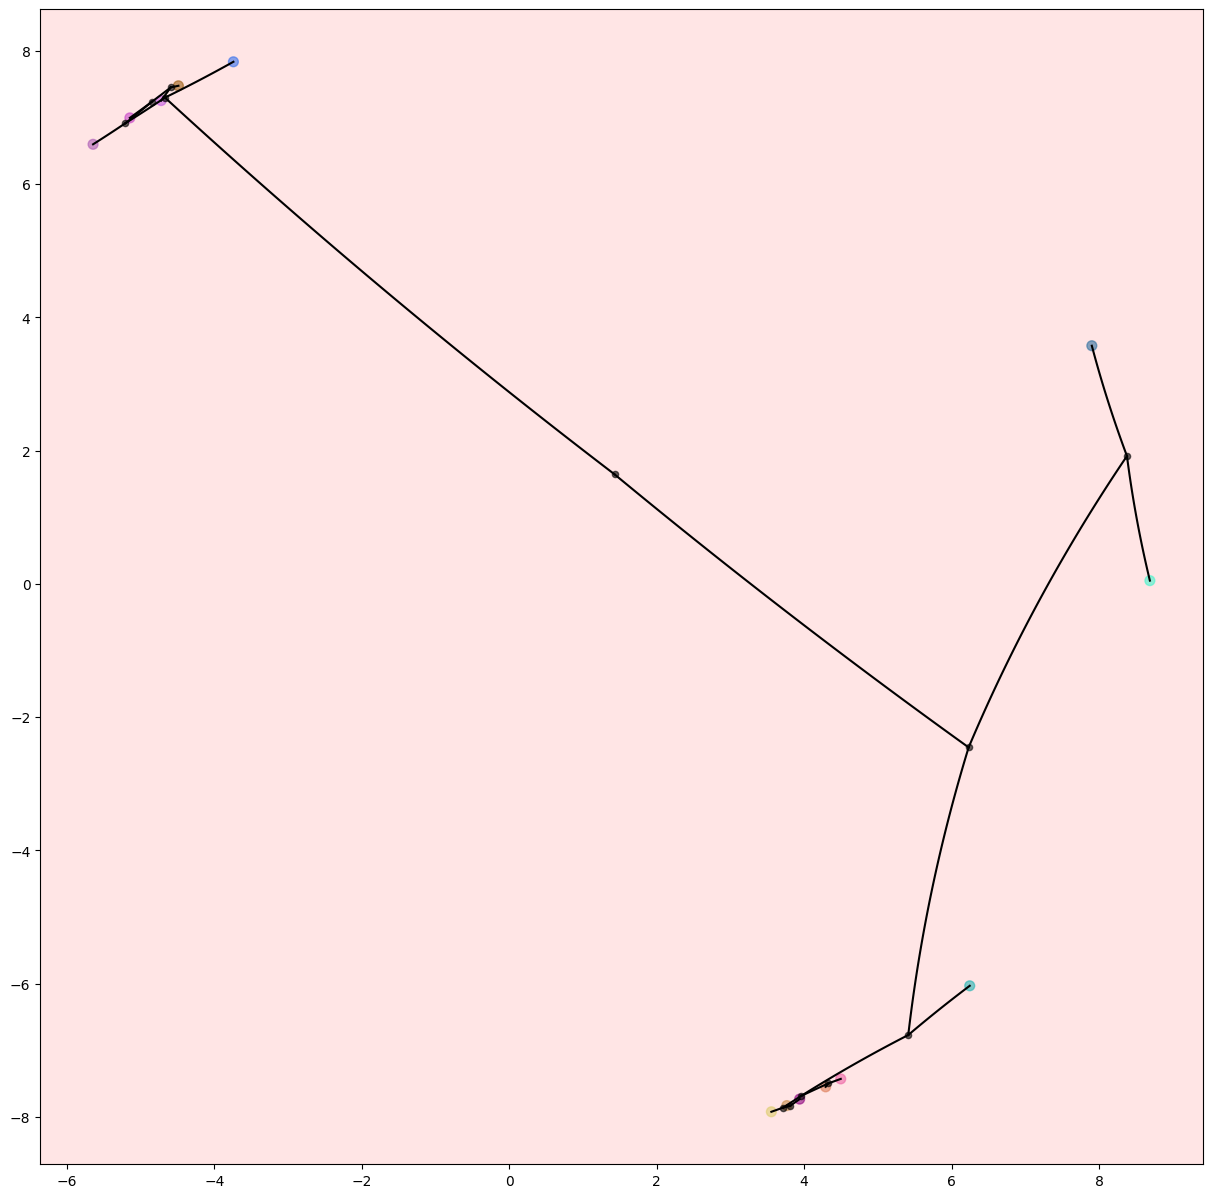

In [25]:
temp = model2.embeddings.weight.data

after_balance = embeddings.copy();
for i in range(len(temp)):
    after_balance[i] = temp[i].detach().numpy() 
# after_balance = model2.normalize_embeddings(torch.tensor(after_balance))
after_balance = project(torch.tensor(after_balance))
after_balance = np.array(after_balance)
colors = get_colors(y_true, 1234)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
circle = plt.Circle((0, 0), 20.0, color='r', alpha=0.1)
ax.add_artist(circle)
ax.scatter(after_balance[:n, 0]*20, after_balance[:n, 1]*20, c=colors, s=50, alpha=0.6)
ax.scatter(after_balance[n:,0]*20,after_balance[n:,1]*20,color ='black',s=20,alpha=0.6)
for n1, n2 in tree.edges():
    x1 = after_balance[n1];
    x2 = after_balance[n2]
    plot_geodesic(x1,x2,ax)
fig.savefig(save_path+"graph_after.png")
np.save(save_path+'data_hyper_xy_after.npy',after_balance)
np.save(save_path+'dataxy.npy',np.array([after_balance[j] for j in [int(i) for i in values]]))


In [26]:
nodes1,n1 = build_hyper_tree(folder_path1)
nodes2,n2 = build_hyper_tree(folder_path2)

merge_list1 = [];
merge_list2 = [];
nodes1[0] = search_tree(nodes1[0],c1,merge_list1)
nodes2[0] = search_tree(nodes2[0],c2,merge_list2)

# for i in range(len(meta_list1)):
#     nodes1[i].name= nodes1[i].name +'_'+ meta_list1[i];
# for i in range(len(meta_list2)):
#     nodes2[i].name= nodes2[i].name +'_'+ meta_list2[i];  

for i in range(len(nodes1)):
    if(int(nodes1[i].name)<len(meta_list1)):
        nodes1[i].name= nodes1[i].name +'_'+ meta_list1[int(nodes1[i].name)];
        
for i in range(len(nodes2)):
    if(int(nodes2[i].name)<len(meta_list2)):
        nodes2[i].name= nodes2[i].name +'_'+ meta_list2[int(nodes2[i].name)];  

    
T=tree_alignment(nodes1[0],nodes2[0],1);
minn = T.run_alignment();
T.show_ans();
ans = T.get_ans()
G=show_graph(ans,nodes1[0],nodes2[0]);
# G.show_fig()
G.save_fig(folder_path1+'alignment.png')
G.save_fig(folder_path2+'alignment.png')



print("average cost for one node:{}\n".format(minn/(n1+n2)))

c=0;z=0
for i,j in ans:
    i=int(i.split('_')[0])
    j=int(j.split('_')[0])
    if(i<len(meta_list1) and j <len(meta_list2)):
        c+=1
        if(meta_list1[i]==meta_list2[j]):
            z+=1;
print('correct alignment rate:{}'.format(z/c))

The mininum cost for alignment is 14.109552634093474
The alignment edges list is [('24', '24'), ('23', '23'), ('19', '17'), ('14', '15'), ('13', '13'), ('11_B cells', '5_B cells'), ('7_B cells', '9_B cells'), ('4_B cells', '10_B cells'), ('0_B cells', '14'), ('20', '22'), ('16', '2_T cells'), ('3_T cells', '0_T cells'), ('22', '20'), ('21', '19'), ('17', '18'), ('6_Monocytes', '1_Monocytes'), ('2_Monocytes', '16'), ('8_Monocytes', '4_Monocytes'), ('5_Monocytes', '12_Monocytes')]
average cost for one node:0.28219105268186945

correct alignment rate:1.0


In [10]:
nodes1,n1 = build_hyper_tree(folder_path1)
nodes2,n2 = build_hyper_tree(folder_path2)

merge_list1 = [];
merge_list2 = [];
nodes1[0] = search_tree(nodes1[0],c1,merge_list1)
nodes2[0] = search_tree(nodes2[0],c2,merge_list2)

# for i in range(len(meta_list1)):
#     nodes1[i].name= nodes1[i].name +'_'+ meta_list1[i];
# for i in range(len(meta_list2)):
#     nodes2[i].name= nodes2[i].name +'_'+ meta_list2[i];  

for i in range(len(nodes1)):
    if(int(nodes1[i].name)<len(meta_list1)):
        nodes1[i].name= nodes1[i].name +'_'+ meta_list1[int(nodes1[i].name)];
        
for i in range(len(nodes2)):
    if(int(nodes2[i].name)<len(meta_list2)):
        nodes2[i].name= nodes2[i].name +'_'+ meta_list2[int(nodes2[i].name)];  

    
T=tree_alignment(nodes1[0],nodes2[0],1);
minn = T.run_alignment();
T.show_ans();
ans = T.get_ans()
G=show_graph(ans,nodes1[0],nodes2[0]);
# G.show_fig()
G.save_fig(folder_path1+'alignment.png')
G.save_fig(folder_path2+'alignment.png')



print("average cost for one node:{}\n".format(minn/(n1+n2)))

c=0;z=0
for i,j in ans:
    i=int(i.split('_')[0])
    j=int(j.split('_')[0])
    if(i<len(meta_list1) and j <len(meta_list2)):
        c+=1
        if(meta_list1[i]==meta_list2[j]):
            z+=1;
print('correct alignment rate:{}'.format(z/c))

The mininum cost for alignment is 14.109552634093474
The alignment edges list is [('24', '24'), ('23', '23'), ('19', '17'), ('14', '15'), ('13', '13'), ('11_B cells', '5_B cells'), ('7_B cells', '9_B cells'), ('4_B cells', '10_B cells'), ('0_B cells', '14'), ('20', '22'), ('16', '2_T cells'), ('3_T cells', '0_T cells'), ('22', '20'), ('21', '19'), ('17', '18'), ('6_Monocytes', '1_Monocytes'), ('2_Monocytes', '16'), ('8_Monocytes', '4_Monocytes'), ('5_Monocytes', '12_Monocytes')]
average cost for one node:0.28219105268186945

correct alignment rate:1.0


In [ ]:
0.8
0.8 normal

In [ ]:
model2.original

In [ ]:
np.around(similarities,1).sum(axis=1)

In [ ]:
datas

In [ ]:
loss = model2.loss(datas[0],datas[1],datas[2],datas[3],datas[4])
loss

In [ ]:
e1 = model2.embeddings(datas[0]);
e2 = model2.embeddings(datas[1]);
e3 = model2.embeddings(datas[2]).clone().detach();
e1 = model2.normalize_embeddings(e1);
e2 = model2.normalize_embeddings(e2);
e3 = model2.normalize_embeddings(e3);

In [ ]:
origin_distance = hyp_dist(torch.tensor(model2.original[datas[0]]),torch.tensor(model2.original[datas[1]]));
origin_distance

In [ ]:
d1 = hyp_dist(e1,e3) + datas[3];
d2 = hyp_dist(e2,e3) + datas[3];
lca_norm = torch.cat([d1, d2], dim=-1)
weights = torch.softmax(lca_norm / model2.temperature, dim=-1)
w_ord = torch.sum(datas[4] * weights, dim=-1, keepdim=True)


In [ ]:
total = torch.sum(datas[4], dim=-1, keepdim=True) - w_ord + model2.hyperparamter*torch.abs(origin_distance - hyp_dist(e1,e2));
total

In [ ]:
x, y_true, similarities = load_data('./datas/pre3/d1/datas.data',1,1616,0)
dataset = HCDataset(x, y_true, similarities, num_samples=50000)
dataloader = data.DataLoader(dataset, batch_size=32, shuffle=True, num_workers=8, pin_memory=True)
model = HypHC(dataset.n_nodes, 2, 5e-2, 5e-2 ,0.999)
params=torch.load('./datas/pre3/d1/model.pth')
model.load_state_dict(params, strict=False)
sim_fn = lambda x, y: torch.sum(x * y, dim=-1)
n=len(x);
leaves_embeddings = model.normalize_embeddings(model.embeddings.weight.data)
leaves_embeddings = project(leaves_embeddings).detach().cpu()
ijs = sl_np_mst_ij(leaves_embeddings,sim_fn)
uf = UnionFind(n,leaves_embeddings)
uf.merge(ijs)
count=0
tree = nx.DiGraph()
for i, j in enumerate(uf.tree()[:-1]):
    if(j!=-1):
        tree.add_edge(j, i)
n = len(leaves_embeddings)
# embeddings = np.array(uf.pos)
embeddings = complete_tree(tree, leaves_embeddings)

In [ ]:
nodes1 = [node(name=str(i),son=[]) for i in range(len(uf.tree()))]
for i in range(n):
    nodes1[i].subson=[i];
for i,j in enumerate(uf.tree()):
    if(j!=-1):
        nodes1[j].son.append(nodes1[i])
    nodes1[i].value=embeddings[i];
    nodes1[j].subson.extend(nodes1[i].subson)
ans_list = []
root = nodes1[-1];
dumpy_node = nodes1[n:]

In [ ]:
result = []

for t in (dumpy_node):
    left = t.son[0].subson
    right = t.son[1].subson;
    out_inner=[];
    for i in left:
        inner_list=[];
        for j in right:
            inner_list.append([i,j])
        out_inner.append(inner_list)
    result.append(out_inner)
result

In [ ]:

dataset_test = IMDataset(similarities,2560,leaves_embeddings,result)
dataset_test

In [ ]:
len(dataset_test)

In [ ]:
dumpys = [i.value for i in dumpy_node]
dumpys

In [ ]:
from model.improvehc import improvehc

dataloader = data.DataLoader(dataset_test, batch_size=1, shuffle=True, num_workers=8, pin_memory=True)
model = improvehc(leaves_embeddings,dumpys,dataset_test.n_nodes)

In [ ]:
for step,i in enumerate(dataset_test):
    print(step,i)
    break

In [ ]:
dataset_test[1]

In [ ]:
Optimizer = getattr(optim, 'RAdam')
optimizer = Optimizer(model.parameters(),0.05)

# train(model,dataloader,optimizer,similarities,epoches);

In [ ]:
for epoch in range(20):
    model.train()
    total_loss = 0.0
    print(model.embeddings.weight.data)
    for step, data in enumerate(dataloader):
        lca = data[0]
        l_and_r = data[1].tolist()
        sims = data[2]
        loss = model.loss(lca,l_and_r,sims)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss
    total_loss = total_loss.item() / (step + 1.0)
    print("\t Epoch {} | average train loss: {:.6f}".format(epoch, total_loss))

    # keep best embeddings
    # if (epoch + 1) % 1 == 0:
#         tree = model.decode_tree(fast_decoding=1)
#         cost = dasgupta_cost(tree, similarities)
#         logging.info("{}:\t{:.4f}".format("Dasgupta's cost", cost))
#         if cost < best_cost:
#             counter = 0
#             best_cost = cost
#             best_model = model.state_dict()
#         else:
#             counter += 1
#             if counter == 20:
# #                 logging.info("Early stopping.")
#                 return


In [ ]:
d1=torch.tensor(embeddings[0])
d2=torch.tensor(embeddings[1])

In [ ]:
hyp_dist_o(d1)+hyp_dist_o(d2)

In [ ]:
hyp_dist(d1,d2)

In [ ]:
similarities

In [ ]:
hyp_dist(torch.tensor(nodes1[0].value),torch.tensor(nodes1[1].value))
